In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    # Splits arrays or matrices into random train and test subsets
from sklearn.model_selection import KFold               # Cross-validator
from sklearn.model_selection import cross_validate      # Evaluate metrics by cross-validation
from sklearn.model_selection import GridSearchCV        # Search over specified parameter values for an estimator
from sklearn.compose import ColumnTransformer           # Applies transformers to columns of DataFrames
from sklearn.pipeline import Pipeline                   # Helps building a chain of transforms and estimators
from sklearn.impute import SimpleImputer                # Imputation transformer for completing missing values
from sklearn.preprocessing import OneHotEncoder         # Encode categorical features
from sklearn.metrics import mean_absolute_error         # One of many statistical measures of error
from xgboost import XGBRegressor                        # Our model estimator

In [2]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 3.1 MB/s eta 0:00:00


In [4]:
data=pd.read_csv(r"C:\Users\vaibh\Desktop\house-prices-advanced-regression-techniques\train.csv")
dta_test=pd.read_csv(r"C:\Users\vaibh\Desktop\house-prices-advanced-regression-techniques\test.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

In [6]:
dta_test.shape

(1459, 80)

In [7]:
dta_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
for i in data:
    if data[i].isna().sum()>0:
        print(f"{i}--------{(data[i].isna().sum()/1460)*100:.2f} % of the data are Null values")

LotFrontage--------17.74 % of the data are Null values
Alley--------93.77 % of the data are Null values
MasVnrType--------0.55 % of the data are Null values
MasVnrArea--------0.55 % of the data are Null values
BsmtQual--------2.53 % of the data are Null values
BsmtCond--------2.53 % of the data are Null values
BsmtExposure--------2.60 % of the data are Null values
BsmtFinType1--------2.53 % of the data are Null values
BsmtFinType2--------2.60 % of the data are Null values
Electrical--------0.07 % of the data are Null values
FireplaceQu--------47.26 % of the data are Null values
GarageType--------5.55 % of the data are Null values
GarageYrBlt--------5.55 % of the data are Null values
GarageFinish--------5.55 % of the data are Null values
GarageQual--------5.55 % of the data are Null values
GarageCond--------5.55 % of the data are Null values
PoolQC--------99.52 % of the data are Null values
Fence--------80.75 % of the data are Null values
MiscFeature--------96.30 % of the data are Null 

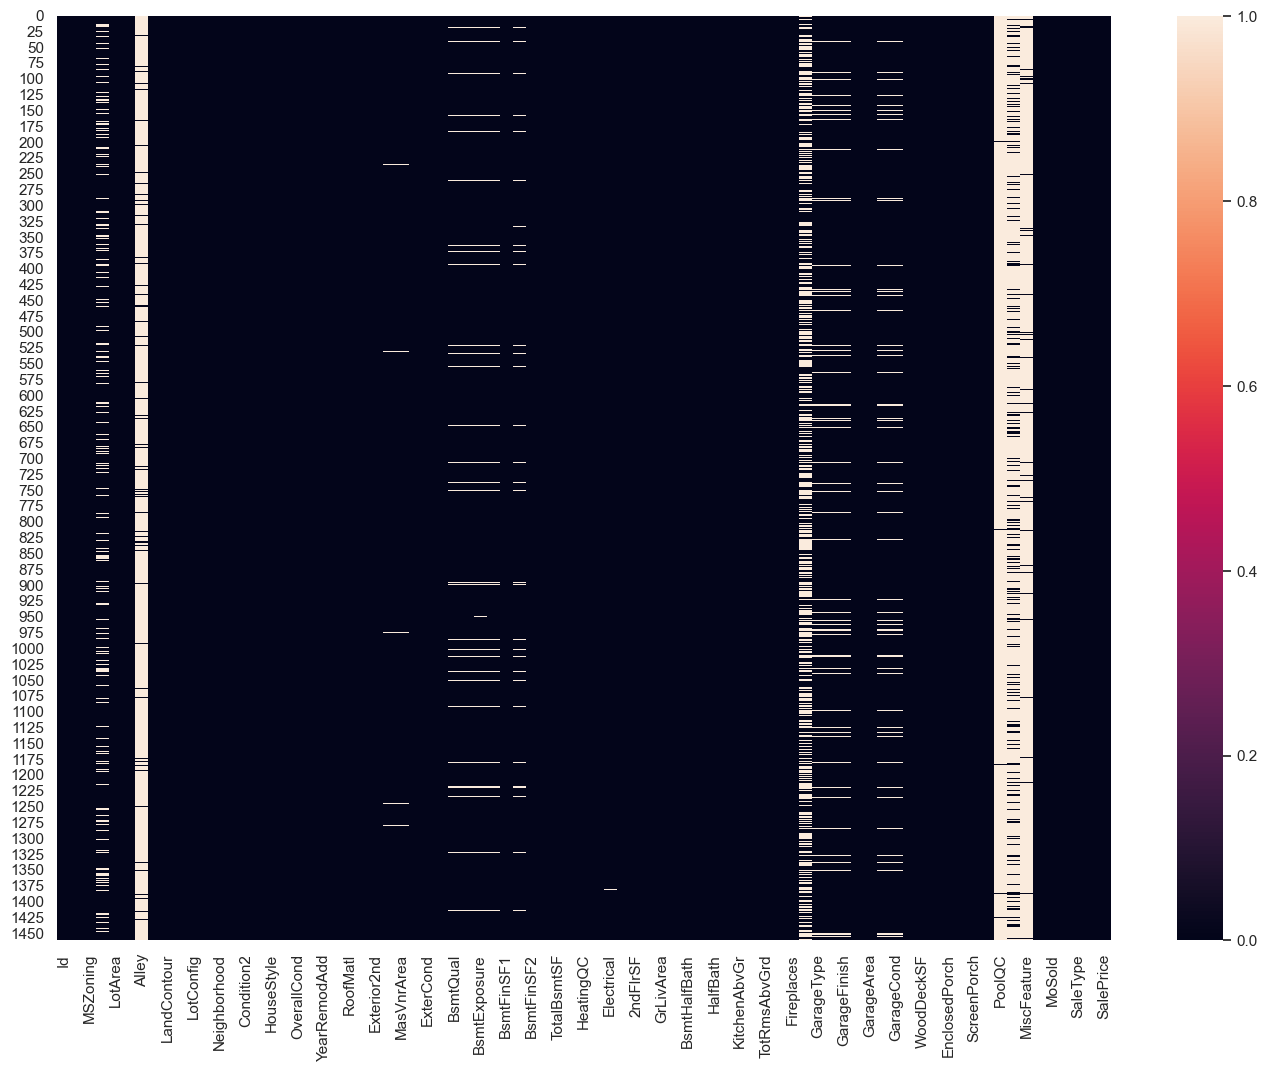

In [11]:
sns.set(rc={'figure.figsize':(17,12)})
sns.heatmap(data.isnull());

In [14]:
for i in data:
    if data[i].isna().sum()>0 and (data[i].dtypes=='int64' or data[i].dtypes=='float64' ):
         data[i].fillna(data[i].mean(),inplace=True)
         print(i)
        
            
    if data[i].dtypes=='object':
          if (data[i].isna().sum()/1460)*100>=70.0:
             data.drop([i],inplace=True,axis=1)
               
for i in dta_test:
    if dta_test[i].isna().sum()>0 and (dta_test[i].dtypes=='int64' or dta_test[i].dtypes=='float64' ):
         dta_test[i].fillna(dta_test[i].mean(),inplace=True)
         print(i)
        

    if dta_test[i].dtypes=='object':
          if (dta_test[i].isna().sum()/1460)*100>=70.0:
             dta_test.drop([i],inplace=True,axis=1)         

LotFrontage
MasVnrArea
GarageYrBlt
LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea


In [15]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
data.shape

(1460, 77)

In [18]:
for i in data:
    if data[i].isna().sum()>0:
        print(f"{i}--{data[i].dtype}------{(data[i].isna().sum()/1460)*100:.2f} % of the data are Null values")

MasVnrType--object------0.55 % of the data are Null values
BsmtQual--object------2.53 % of the data are Null values
BsmtCond--object------2.53 % of the data are Null values
BsmtExposure--object------2.60 % of the data are Null values
BsmtFinType1--object------2.53 % of the data are Null values
BsmtFinType2--object------2.60 % of the data are Null values
Electrical--object------0.07 % of the data are Null values
FireplaceQu--object------47.26 % of the data are Null values
GarageType--object------5.55 % of the data are Null values
GarageFinish--object------5.55 % of the data are Null values
GarageQual--object------5.55 % of the data are Null values
GarageCond--object------5.55 % of the data are Null values


In [19]:
for i in data:
    if data[i].isna().sum()>0:
       data[i]=data[i].fillna(data[i].mode()[0])

for i in dta_test:
    if dta_test[i].isna().sum()>0:
       dta_test[i]=dta_test[i].fillna(dta_test[i].mode()[0]) 

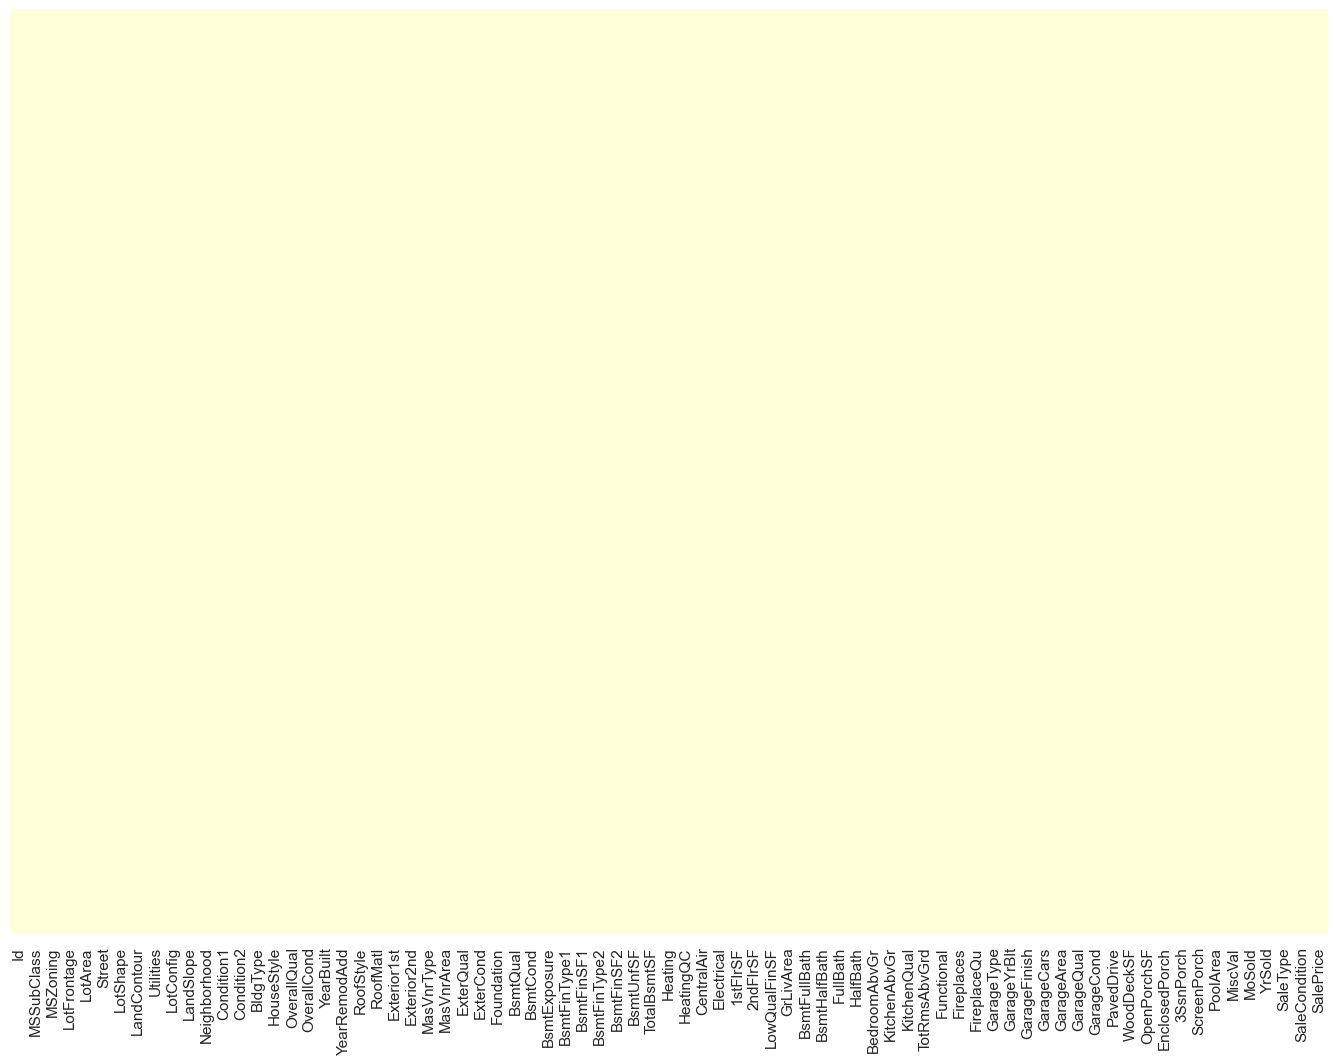

In [20]:
sns.set(rc={'figure.figsize':(17,12)})
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu');

In [21]:
data.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [22]:
data.drop(['Id'],axis=1,inplace=True)
dta_test.drop(['Id'],axis=1,inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [23]:
columns=[]
for i in data:
   if data[i].dtype=='object':
       columns.append(i)
print(columns)  

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [24]:
data.drop(['GarageYrBlt'],axis=1,inplace=True)
dta_test.drop(['GarageYrBlt'],axis=1,inplace=True)
data.dropna(inplace=True)
dta_test.dropna(inplace=True)

In [25]:
X = data.copy()
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)


In [26]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, 
                                                                train_size=0.8, 
                                                                test_size=0.2, 
                                                                random_state=0)

In [27]:
categorical_cols = [col for col in X_train_full.columns if 
                   X_train_full[col].nunique() <= 15 and
                   X_train_full[col].dtype == 'object']

# Select numeric values
numeric_cols = [col for col in X_train_full.columns if
                X_train_full[col].dtype in ['int64', 'float64']]

# Keep selected columns
my_columns = categorical_cols + numeric_cols
X_train = X_train_full[my_columns].copy()
X_valid = X_valid_full[my_columns].copy()
X_test = dta_test[my_columns].copy()

In [28]:
#Preprocessing numerical values
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing categorical values
categorical_transformer = Pipeline(steps=[
                                   ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
                                   ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                   ])

# Pack the preprocessors together
preprocessor = ColumnTransformer(transformers=[
                                 ('num', numerical_transformer, numeric_cols),
                                 ('cat', categorical_transformer, categorical_cols)
                                 ])

In [29]:
# Define the model with default parameters
model = XGBRegressor(verbosity=0, random_state=0)

# Pack preprocessing and modeling together in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                              ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 17829.586071275684


In [30]:
# Using KFold cross-validator
kfold = KFold(shuffle=True, random_state=0)

# Evaluating the Mean Absolute Error
scores = cross_validate(my_pipeline, X_train, y_train, 
                              scoring='neg_mean_absolute_error', cv=kfold)

# Multiply by -1 since sklearn calculates negative MAE
print('Average MAE score:', (scores['test_score'] * -1).mean())

Average MAE score: 18316.678347430283


In [31]:
# parameters to be searched over
param_grid = {'model__n_estimators': [ 200, 400, 600],
              'model__max_depth': [2, 3, 5, 10],
              'model__min_child_weight': [0.0001],
              'model__learning_rate': [0.01, 0.1, 1]}

# find the best parameter
kfold = KFold(shuffle=True, random_state=42)
grid_search = GridSearchCV(my_pipeline, param_grid, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)

In [33]:
 #Define final model
final_model = XGBRegressor(n_estimators=400, 
                           max_depth=3, 
                           min_child_weight=0.0001, 
                           learning_rate=0.1, 
                           verbosity=0, 
                           random_state=0
                           )

# Create a pipeline
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('final_model', final_model)
                                 ])

# Fit the model
final_pipeline.fit(X_train, y_train)
# Get predictions on the test set
final_prediction = final_pipeline.predict(X_test)

In [34]:
final_prediction

array([114799.984, 163883.36 , 189705.22 , ..., 170303.47 , 116569.13 ,
       234096.98 ], dtype=float32)